# 🧐 Первичный анализ данных: поездки и пользователи

## 🎯 Ключевые цели
Выявление пропусков, дубликатов, аномалий и анализ распределения данных для последующей очистки и перехода к углубленному исследованию (EDA).

---

## 📋 Этапы первичного анализа

### 1. Подготовка данных
- Импорт необходимых библиотек и файлов данных с помощью `pandas`

### 2. Анализ данных о пользователях
- **Общий осмотр**:
    - Структура данных
    - Типы данных
    - Просмотр случайных строк
- **Детальный анализ**:
    - Проверка на наличие дубликатов и пропусков
    - Изучение распределения числовых столбцов
    - Анализ категориальных признаков

### 3. Анализ данных о поездках
- **Общий осмотр**:
    - Структура данных
    - Типы данных
    - Просмотр случайных строк
- **Детальный анализ**:
    - Выявление аномалий, дубликатов и пропусков
    - Изучение распределения числовых столбцов

---

## 📊 Итоги первичного анализа
На основе проведенного анализа будут сформулированы выводы о качестве данных, определены направления для очистки и подготовлена основа для полноценного исследовательского анализа (EDA).

## 1.1. Импортируем нужные библиотеки

In [54]:
import pandas as pd

from utils import (
    joinpath,
    print_shape_data,
    print_duplicates,
    hist_boxplot,
    scatterplot,
    print_categorical_data
)

## 1.2. Загружаем данные для дальнейшей работы с ними

Создадим словари с настройками для правильной загрузки данных затем через `pandas` загружаем данные.

In [55]:
# Настройка для `users_go.csv`
users_options = {
    "filepath_or_buffer": joinpath("data", "users_go.csv"),
    "encoding": "utf-8",
}

# Настройка для `rides_go.csv`
rides_options = {
    "filepath_or_buffer": joinpath("data", "rides_go.csv"),
    "encoding": "utf-8",
    "parse_dates": ["date"],
}

users_df = pd.read_csv(**users_options)

rides_df = pd.read_csv(**rides_options)

## 2.1. Просмотр общей структуры `users_go.csv`

In [56]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


На основе метода `info` у данных мы получили, что в данных не имеется пропусков, столбцы: `user_id`, `age` относятся к числовым признакам, а `name`, `city`, `subscription_type` к категориальным.

In [57]:
print_shape_data(users_df)

Количество строк данных: 1565
Количество столбцов: 5


In [58]:
users_df.sample(10)

,user_id,name,age,city,subscription_type
607,608,Дарина,26,Ростов-на-Дону,ultra
963,964,Юлия,32,Тюмень,free
1096,1097,Игнат,25,Сочи,free
1194,1195,Виктор,24,Екатеринбург,free
952,953,Наташа,26,Ростов-на-Дону,free
818,819,Мария,28,Омск,free
196,197,Евгения,31,Москва,ultra
974,975,Лидия,26,Ростов-на-Дону,free
591,592,Савелий,24,Пятигорск,ultra
1245,1246,Максим,22,Тюмень,free


Вывели 10 случайных строк для примера.

## 2.2. Проверка на дубликаты, пропуски `users_go.csv`

#### В этом блоке мы просматриваем `users_go.csv` на наличие дубликатов, пропусков.

In [59]:
# Получаем дубликаты из данных
direct_duplicated_users_df_mask = print_duplicates(users_df)

Количество дубликатов: 31.


Видим, что прямых дубликатов 31, просмотрим непрямые дубликаты т.е дубликаты только по `user_id`.

In [60]:
# Получаем дубликаты из данных
indirect_duplicated_users_df_mask = print_duplicates(users_df, subset="user_id")

Количество дубликатов: 31.


Количество прямых и непрямых дубликатов совпало выведим первые 5.

In [61]:
users_df[direct_duplicated_users_df_mask].head()

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free


In [62]:
users_df[indirect_duplicated_users_df_mask].head()

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free


В действительности прямые и непрямые дубликаты совпадают в дальнейшем при очистки данных удалим их.

In [63]:
all(direct_duplicated_users_df_mask == indirect_duplicated_users_df_mask)

True

Дополнительно проверили по каждому дубликату, теперь приступаем к просмотру пропусков.

In [64]:
users_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Как и предполагалось пропуски не были найдены т.к при общем анализе с помощью метода `info` не было выявлено пропусков.

## 2.3. Распределение числовых признаков.

#### В этом блоке рассмотрим распределение возраста т.к `user_id` является только `PrimaryKey` для каждого пользователя.

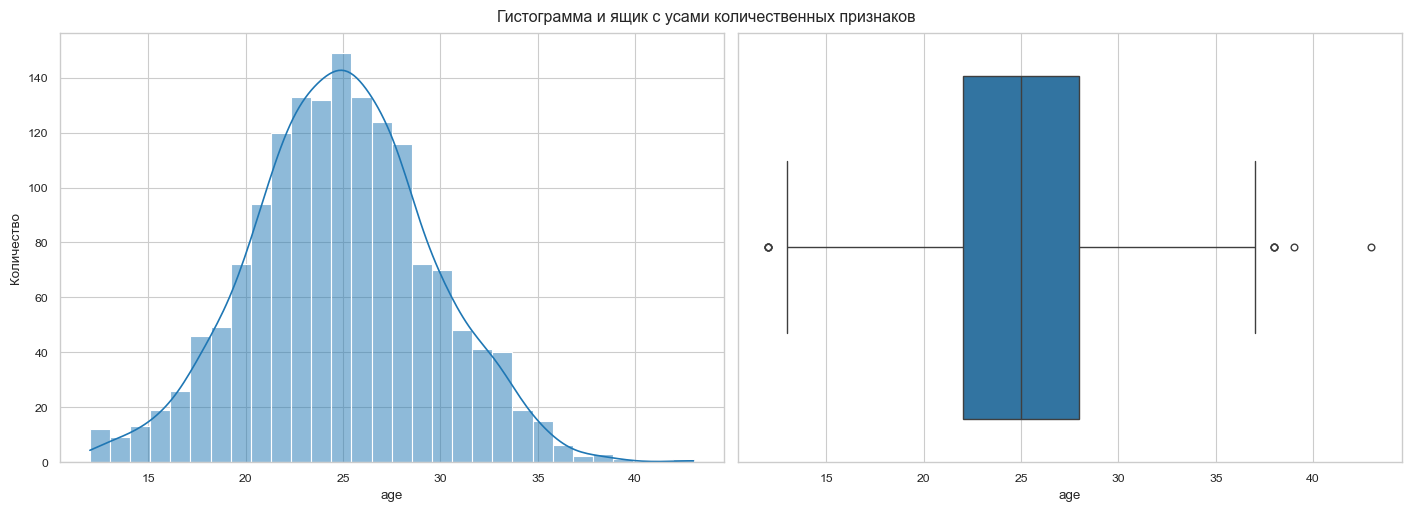

In [65]:
hist_boxplot(
    users_df, columns=["age"], kde=True
)  # Вызов функции для создания гистограммы и ящика с усами

По графику у возраста пользователь нормальное распределение есть небольшой хвост в право т.л присуствует небольшое количество пользователей, которые пользуются GoFast в возрасте 35+, основная масса возраста пользователей находится 20-30 лет.

In [66]:
users_df["age"].describe().round()

count    1565.0
mean       25.0
std         5.0
min        12.0
25%        22.0
50%        25.0
75%        28.0
max        43.0
Name: age, dtype: float64

В действительности имеем, что среднее 25 лет минимальный возраст для пользователя 12, а максимальный 43.

## Анализ категориальных признаков в `users_go.csv`

#### В этом блоке мы анализируем категориальные признаки ищем возможные разные форматы одних и тех же данных.

In [67]:
# Выбираем только категориальные столбцы
users_categories = users_df.select_dtypes(include=["object"])

users_categories.head()

,name,city,subscription_type
0,Кира,Тюмень,ultra
1,Станислав,Омск,ultra
2,Алексей,Москва,ultra
3,Константин,Ростов-на-Дону,ultra
4,Адель,Омск,ultra


Выбрали только категориальные столбцы данных.

In [68]:
print_categorical_data(users_categories)  # Функция для анализа категориальных данных

--------------------------------------------------
Колонка: name
- Уникальных значений: 194
- Топ 10 по количество:
name
Мария        23
Анна         22
Александр    18
Дмитрий      17
Никита       17
Иван         15
Кира         15
Регина       14
Ксения       14
Руслан       13
Name: count, dtype: int64

--------------------------------------------------
Колонка: city
- Уникальных значений: 8
- Топ 10 по количество:
city
Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: count, dtype: int64

--------------------------------------------------
Колонка: subscription_type
- Уникальных значений: 2
- Топ 10 по количество:
subscription_type
free     846
ultra    719
Name: count, dtype: int64



По данным видим, что как таковых разных форматов данных не найдено.

## 3.1. Просмотр общей структуры `rides_go.csv`

In [69]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


На основе метода `info` у данных мы получили, что в данных не имеется пропусков, все столбцы относятся к числовым признакам, а именно `user_id` - числовой дискретный признак, `distance`, `duration` - числовой непрерывный признак, `date` - числовой временой признак.

In [70]:
print_shape_data(rides_df)

Количество строк данных: 18068
Количество столбцов: 4


In [71]:
rides_df.sample(10)

,user_id,distance,duration,date
5936,632,4030.598251,31.183590,2021-08-04
875,94,3289.474576,17.387814,2021-04-10
15343,1342,672.131419,8.680329,2021-06-29
12886,1166,2963.194712,19.111667,2021-04-20
747,82,2916.290462,15.729901,2021-01-04
16683,1434,3323.372184,15.293489,2021-07-14
6690,712,4181.992672,34.909963,2021-11-20
7481,770,1983.866565,16.821090,2021-05-05
1962,212,3313.175523,15.693561,2021-08-15
2917,312,3232.161437,19.928646,2021-12-12


Выводим 10 случайных строк.

## 3.2. Проверка на дубликаты и пропуски `rides_go.csv`

#### В этом блоке мы просматриваем `rides_go.csv` на наличие дубликатов, пропусков.

In [72]:
direct_duplicated_rides_df_mask = print_duplicates(rides_df)

Количество дубликатов: 0.


Не было выявлено прямых дубликатов проверяем так же для не прямых (Только колонки `distance`, `duration`, `date`)

In [73]:
indirect_duplicated_rides_df_mask = print_duplicates(
    rides_df, subset=rides_df.columns[1:]
)

Количество дубликатов: 0.


По итогу проверки дубликатов в `rides_go.csv` не были выявлены.

In [74]:
rides_df.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

Не было выявлено пропусков в каждом из столбцам, вполне ожидаемо т.к просматривали через метод `info` и там не было выявлено пропусков.

## 3.3. Выявление аномалий и распределение числовых признаков.

#### В этом блоке рассматриваем к каким типам распределений каждый признак относится и имеются в нем аномалии.

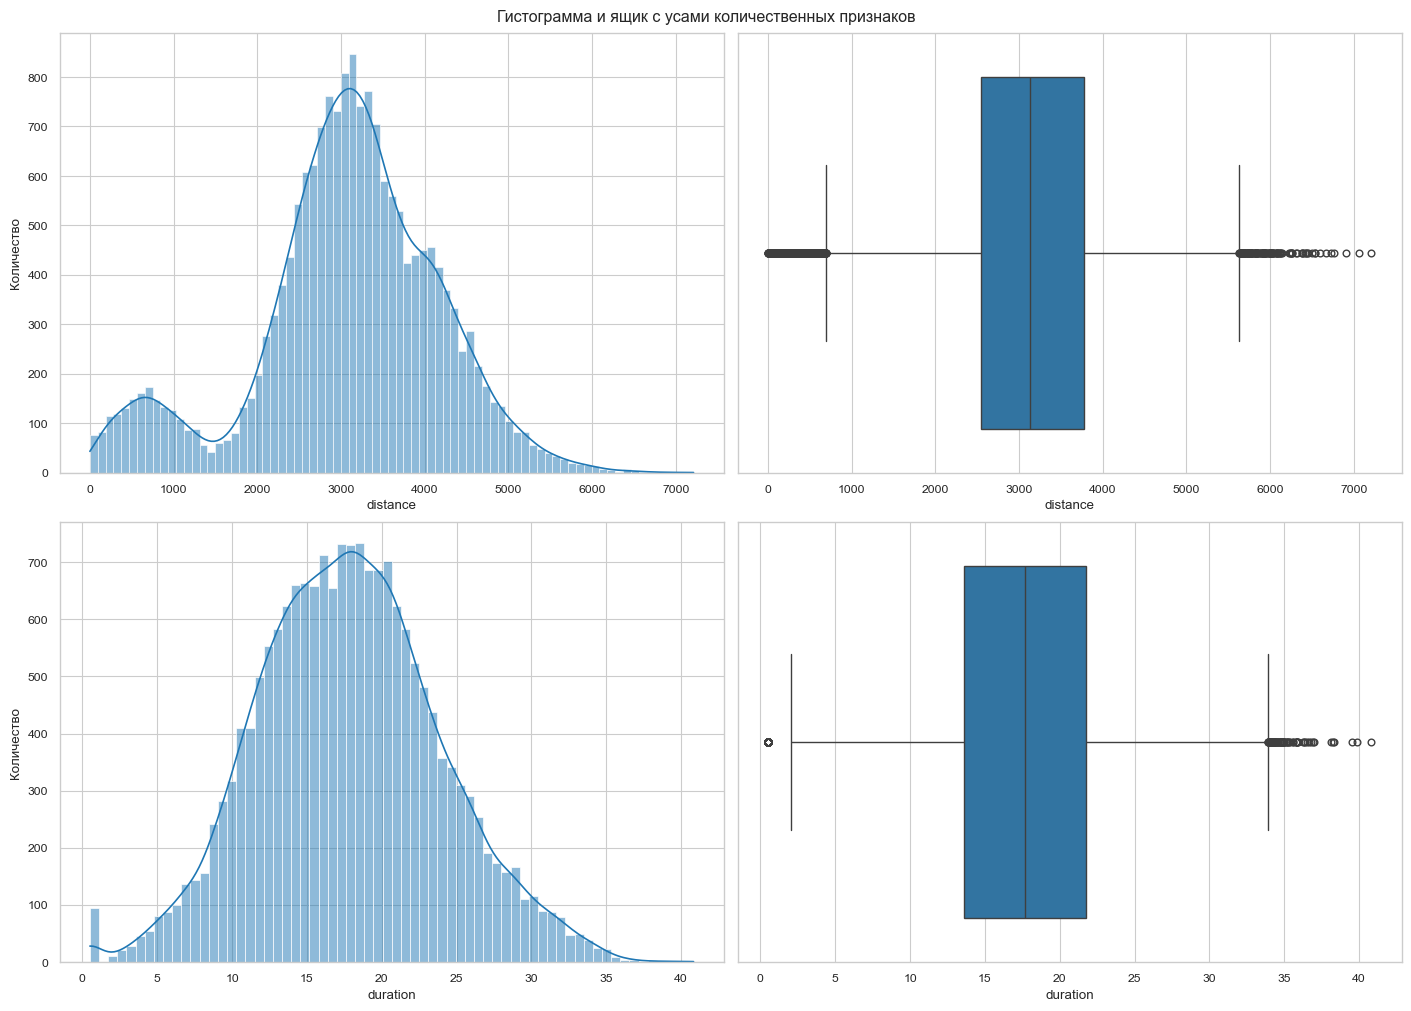

In [75]:
hist_boxplot(rides_df, columns=["distance", "duration"], kde=True)

`distance` имеет основной пик расстояний поездок (2000-4000м) и малый пик (0-1500м) и имеется хвост вправо. `duration` имеется вполне нормальное распределение, но и большое количество поездок с временем приблеженым к 0 минут, а так эе небольшой хвост вправо, требуется рассмотреть эти строки для понимания причин такого количества данных.

In [76]:
rides_df[rides_df.columns[1:]].describe().round().T

,count,mean,min,25%,50%,75%,max,std
distance,18068.0,3071.0,1.0,2543.0,3134.0,3776.0,7211.0,1117.0
duration,18068.0,18.0,0.0,14.0,18.0,22.0,41.0,6.0
date,18068,2021-06-30 19:47:21.266327296,2021-01-01 00:00:00,2021-04-02 00:00:00,2021-06-30 00:00:00,2021-09-28 00:00:00,2021-12-30 00:00:00,NaN


Видим, что средняя дистанция 3000м минимум 1, что может говорить о сбоях в некоторых поездках или случайных вызовах и максимум 7000м вполне нормальное количество для времени поездки среднее 18 минут, а вот минимум является аномалией требуемый точной проверки причин, максимум вполне обычный. Так же данные предоставлены с 2021-01-01 по 2021-12-30.

In [77]:
rides_df[rides_df["duration"] < 1].sort_values("distance", ascending=False)

,user_id,distance,duration,date
16309,1411,7211.007745,0.5,2021-04-15
17242,1477,6724.932981,0.5,2021-01-12
11385,1057,6601.197575,0.5,2021-02-07
13701,1224,6414.516026,0.5,2021-07-15
14574,1285,6316.574814,0.5,2021-09-25
...,...,...,...,...
14342,1268,4177.139336,0.5,2021-06-09
9698,937,4169.066800,0.5,2021-12-12
10692,1006,4106.278268,0.5,2021-10-31
17909,1524,4103.998874,0.5,2021-06-18


Видим, что в данных имеется скорее всего сбой который проставлял 0.5 минут для обычных поездок.

In [78]:
len(rides_df[rides_df["duration"] < 1]) / rides_df.shape[0] * 100

0.5257914545052026

Количество таких аномалий составляет меньше одного процента в дальнейшем мы просто можем их удалить за счет фильтрации.

In [79]:
rides_df[rides_df["distance"] < 50].sort_values("duration", ascending=False).head(10)

,user_id,distance,duration,date
6611,707,28.793204,14.143966,2021-09-12
15870,1381,31.391295,14.099130,2021-06-29
10349,982,43.690381,13.201648,2021-07-21
11566,1069,44.016496,13.110041,2021-06-20
11862,1091,15.630873,13.044660,2021-03-29
9439,918,38.711151,11.165905,2021-06-08
16409,1417,44.728663,10.127796,2021-09-20
13940,1240,15.000606,10.045002,2021-08-20
7841,796,7.097072,10.026614,2021-11-26
11555,1069,0.855683,10.001902,2021-01-31


Видны аномалии в расстояние например поездка длится 14 минут, а всего пройдено 29 метров, может говорить о том, что был сбой программы рассчитывающей расстояние в дальнейшем так же такие поездки будут удалены с помощью фильтрации.

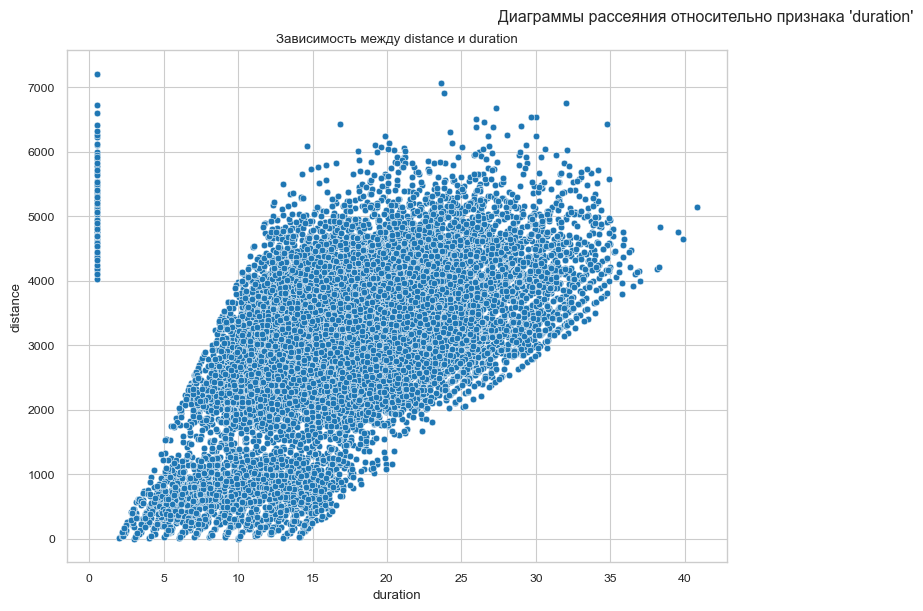

In [80]:
scatterplot(rides_df, "duration", ["distance"])

За счет графика зависимости между расстроянием и временем затраченым на поездку видим в действительности выбросы у `duration` близким к нулю и расстояние близким к нулю с временем.

## 📊 Итоги первичного анализа данных

### 📂 Общая оценка данных
**Файлы анализированы:**
- `users_go.csv` — данные о пользователях
- `rides_go.csv` — данные о поездках

**✅ Положительные находки:**
- **Отсутствие пропусков** — во всех столбцах обоих файлов
- **Чистота категориальных данных** — столбцы `name`, `city`, `subscription_type` не содержат разных форматов одних и тех же значений

### 🔍 Ключевые выявленные особенности

#### 👥 Данные пользователей (`users_go.csv`)
- **Возрастная характеристика**:
  - Распределение столбца `age` близко к нормальному с небольшим правым хвостом
  - Диапазон значений: **12–43 года** (без аномалий)
- **Проблема дублирования**:
  - Обнаружено **31 дубликат** (прямых и непрямых)
  - В `rides_go.csv` дубликаты отсутствуют

#### 🚲 Данные поездок (`rides_go.csv`)
- **Дистанция (`distance`)**:
  - Распределение имеет малый и большой пик
  - Причина: короткие поездки (1–5 минут) и обычные поездки
  - **Аномалии**: нереальные значения (например, 29 метров за 14 минут)

- **Длительность (`duration`)**:
  - В целом нормальное распределение
  - **Аномалии**: значения 0.5 минуты при нормальной дистанции

- **Временной охват**:
  - Данные собраны за период **с 1 января по 30 декабря 2021 года** (полный год)

### ⚠️ Выявленные проблемы для обработки
1. **Дубликаты пользователей** — 31 запись
2. **Аномальные значения дистанции** — нереальные сочетания метраж/время
3. **Аномальные значения длительности** — слишком короткие поездки при нормальной дистанции

### 🔄 План дальнейших действий
#### Этап очистки данных:
1. Удаление дубликатов из `users_go.csv`
2. Очистка аномалий путем фильтрации
3. Верификация корректности временных промежутков

#### Последующие этапы:
- **Детальный EDA-анализ**
- **Проверка гипотез** о поведении пользователей и закономерностях поездок

---

**💡 Вывод:** Данные в целом качественные, требуют минимальной очистки перед углублённым анализом.